<a href="https://colab.research.google.com/github/giddy-mpungu/MCS_7103-ML/blob/main/insurance_claim_ml_assignment_notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Machine Learning Assignment - Insurance Claim Prediction

In this assignment, we aim to predict insurance claims using various machine learning techniques. The process involves data preprocessing, exploratory data analysis, feature engineering, model selection, and evaluation.This notebook outlines the steps taken in using machine learning to predict insurance claims.

## Setup and Data Loading

Load the datasets using pandas.
Perform initial exploration (.info(), .describe(), .isnull().sum()) to understand the structure, identify missing values, and get a sense of data distribution.

In [ ]:

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import roc_auc_score


## Exploratory Data Analysis (EDA)

Understanding the dataset is a crucial step in any machine learning project. We begin by exploring the variable descriptions to understand each feature's role. Then, we will load and examine the training and testing datasets to get a sense of their structure, types of variables, and any initial signs of missing or unusual data.


Variable Description

I'll proceed to examine the "VariableDescription.csv" to understand the features of the dataset.​

In [ ]:
# Load the variable descriptions
variable_description_path = 'VariableDescription.csv'

# Read the variable descriptions into a Pandas DataFrame
variable_descriptions = pd.read_csv(variable_description_path)

# Display the variable descriptions
variable_descriptions


,Variable,Description
0,Customer Id,Identification number for the Policy holder
1,YearOfObservation,year of observation for the insured policy
2,Insured_Period,duration of insurance policy in Olusola Insura...
3,Residential,is the building a residential building or not
4,Building_Painted,"is the building painted or not (N-Painted, V-N..."
5,Building_Fenced,"is the building fence or not (N-Fenced, V-Not ..."
6,Garden,building has garden or not (V-has garden; O-no...
7,Settlement,Area where the building is located. (R- rural ...
8,Building Dimension,Size of the insured building in m2
9,Building_Type,"The type of building (Type 1, 2, 3, 4)"


Next, I will load and explore the training and testing datasets to understand their structure, distributions, and any missing values. Let's start with the "train_data.csv" file.​

In [ ]:
# Load the training data
train_data_path = 'train_data.csv'

# Read the training data into a Pandas DataFrame
train_data = pd.read_csv(train_data_path)

# Display the first few rows of the DataFrame and the summary information
train_data_info = train_data.info()
train_data_head = train_data.head()

(train_data_info, train_data_head)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7160 entries, 0 to 7159
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Customer Id         7160 non-null   object 
 1   YearOfObservation   7160 non-null   int64  
 2   Insured_Period      7160 non-null   float64
 3   Residential         7160 non-null   int64  
 4   Building_Painted    7160 non-null   object 
 5   Building_Fenced     7160 non-null   object 
 6   Garden              7153 non-null   object 
 7   Settlement          7160 non-null   object 
 8   Building Dimension  7054 non-null   float64
 9   Building_Type       7160 non-null   int64  
 10  Date_of_Occupancy   6652 non-null   float64
 11  NumberOfWindows     7160 non-null   object 
 12  Geo_Code            7058 non-null   object 
 13  Claim               7160 non-null   int64  
dtypes: float64(3), int64(4), object(7)
memory usage: 783.2+ KB


(None,
   Customer Id  YearOfObservation  Insured_Period  Residential  \
 0      H14663               2013             1.0            0   
 1       H2037               2015             1.0            0   
 2       H3802               2014             1.0            0   
 3       H3834               2013             1.0            0   
 4       H5053               2014             1.0            0   
 
   Building_Painted Building_Fenced Garden Settlement  Building Dimension  \
 0                N               V      V          U               290.0   
 1                V               N      O          R               490.0   
 2                N               V      V          U               595.0   
 3                V               V      V          U              2840.0   
 4                V               N      O          R               680.0   
 
    Building_Type  Date_of_Occupancy NumberOfWindows Geo_Code  Claim  
 0              1             1960.0               .     105

The training data contains 7,160 entries with the following observations:

- There are missing values in the columns Garden, Building Dimension, Date_of_Occupancy, and Geo_Code.
- The NumberOfWindows column is of type object, which suggests it might contain non-numeric data (such as '.').
- All other columns have complete data.

Next, I'll load the testing dataset to explore its structure and then we can proceed with data preprocessing for both datasets. Let's examine the "test_data.csv" file.​

In [ ]:
# Load the testing data
test_data_path = 'test_data.csv'

# Read the testing data into a Pandas DataFrame
test_data = pd.read_csv(test_data_path)

# Display the first few rows of the DataFrame and the summary information
test_data_info = test_data.info()
test_data_head = test_data.head()

(test_data_info, test_data_head)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3069 entries, 0 to 3068
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Customer Id         3069 non-null   object 
 1   YearOfObservation   3069 non-null   int64  
 2   Insured_Period      3069 non-null   float64
 3   Residential         3069 non-null   int64  
 4   Building_Painted    3069 non-null   object 
 5   Building_Fenced     3069 non-null   object 
 6   Garden              3065 non-null   object 
 7   Settlement          3069 non-null   object 
 8   Building Dimension  3056 non-null   float64
 9   Building_Type       3069 non-null   int64  
 10  Date_of_Occupancy   2341 non-null   float64
 11  NumberOfWindows     3069 non-null   object 
 12  Geo_Code            3056 non-null   object 
dtypes: float64(3), int64(3), object(7)
memory usage: 311.8+ KB


(None,
   Customer Id  YearOfObservation  Insured_Period  Residential  \
 0      H11920               2013        1.000000            0   
 1      H11921               2016        0.997268            0   
 2       H9805               2013        0.369863            0   
 3       H7493               2014        1.000000            0   
 4       H7494               2016        1.000000            0   
 
   Building_Painted Building_Fenced Garden Settlement  Building Dimension  \
 0                V               N      O          R               300.0   
 1                V               N      O          R               300.0   
 2                V               V      V          U               790.0   
 3                V               N      O          R              1405.0   
 4                V               N      O          R              1405.0   
 
    Building_Type  Date_of_Occupancy NumberOfWindows Geo_Code  
 0              1             1960.0               3     3310  
 1 

The testing data contains 3,069 entries with the following observations:

- There are missing values in the columns Garden, Building Dimension, Date_of_Occupancy, and Geo_Code.
- The NumberOfWindows column is also of type object in the testing data, suggesting non-numeric data **similar to the training data**.
- All other columns have complete data.

A correlation matrix is useful for understanding the relationships between numerical features.

<ipython-input-5-26d6827842fb>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(train_data.corr(), annot=True, fmt='.2f', cmap='coolwarm')


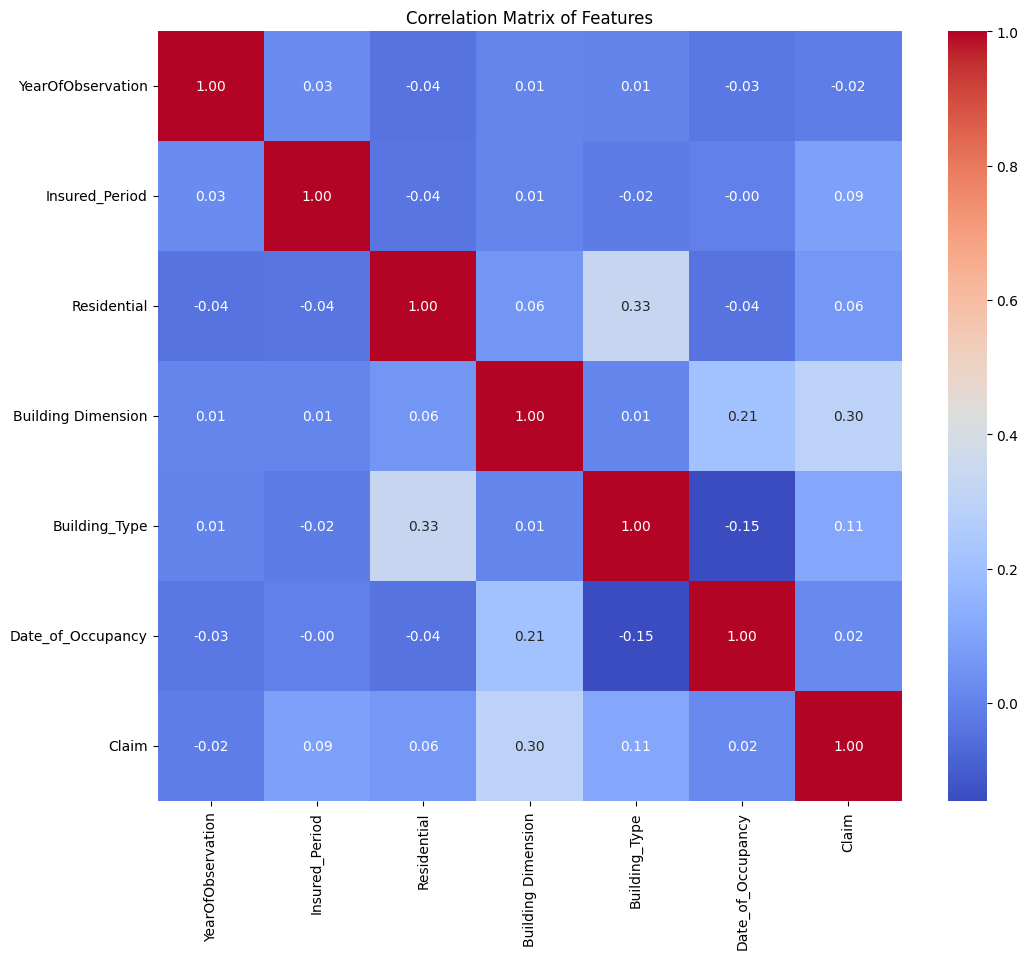

In [ ]:
# Correlation Matrix Heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(train_data.corr(), annot=True, fmt='.2f', cmap='coolwarm')
plt.title('Correlation Matrix of Features')
plt.show()


Now that we have an overview of both the training and testing datasets, we can proceed with the data preprocessing. This will include:

- Handling missing values through imputation or removal.
- Encoding categorical variables.
- Feature selection based on the insights from data exploration.

## Data Preprocessing

Data preprocessing is a critical step to prepare the dataset for machine learning algorithms. This process includes:

- **Dropping 'Customer_ID'**: We removed 'Customer_ID' as it's a unique identifier and does not contribute to model prediction.
- **Handling 'Date_of_Occupancy'**: Converted to integer and imputed missing values with -1, treating them as a separate category. This allows the model to recognize unoccupied dates distinctly.
- **Handling 'NumberOfWindows'**: Converted to numeric, setting non-numeric to NaN for imputation. This standardizes the feature for model input.
- **Imputation of Missing Values**: Used median for numerical columns and most frequent for categorical columns to maintain data integrity and avoid introducing bias.
- **Encoding Categorical Variables**: Applied one-hot encoding to transform categorical variables into a format that can be easily utilized by ML algorithms.

Preprocessing is tailored to the dataset's needs. We chose specific encoding techniques based on the nature of the categorical variables. For example, one-hot encoding was used for nominal categories without intrinsic order, ensuring that the model doesn't misinterpret the categorical values as ordinal.

We dropped the 'Customer_ID' initially but later retained it for generating submission files. This decision ensured that our preprocessing steps aligned with the submission requirements without impacting model performance.

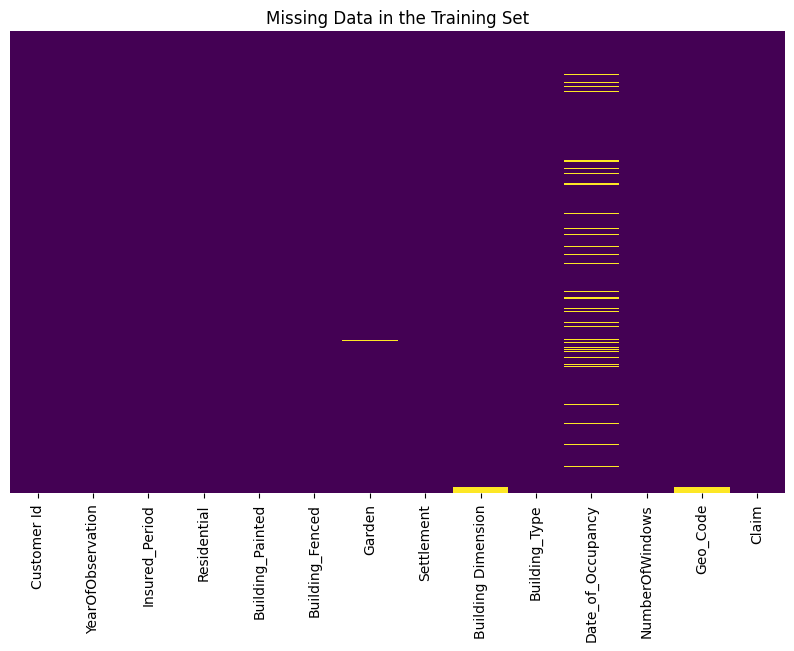

In [ ]:
# Visualizing missing data in the training dataset
plt.figure(figsize=(10, 6))
sns.heatmap(train_data.isnull(), yticklabels=False, cbar=False, cmap='viridis')
plt.title('Missing Data in the Training Set')
plt.show()


 First, I'll handle missing values and encode categorical variables for both the training and testing datasets.

In [ ]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split

# Save the 'Customer_Id' before dropping it
train_customer_id = train_data['Customer Id'].copy()
test_customer_id = test_data['Customer Id'].copy()

# Dropping 'Customer Id' as it is not a feature that affects the outcome
# Check if 'Customer Id' is in the DataFrame and drop it if it is
if 'Customer Id' in train_data.columns:
    train_data.drop('Customer Id', axis=1, inplace=True)
if 'Customer Id' in test_data.columns:
    test_data.drop('Customer Id', axis=1, inplace=True)


# Convert 'Date_of_Occupancy' to int, filling missing values with -1 (to handle as a separate category)
train_data['Date_of_Occupancy'].fillna(-1, inplace=True)
test_data['Date_of_Occupancy'].fillna(-1, inplace=True)
train_data['Date_of_Occupancy'] = train_data['Date_of_Occupancy'].astype(int)
test_data['Date_of_Occupancy'] = test_data['Date_of_Occupancy'].astype(int)

# Convert 'NumberOfWindows' to 'int', setting non-numeric as NaN for imputation
train_data['NumberOfWindows'] = pd.to_numeric(train_data['NumberOfWindows'], errors='coerce')
test_data['NumberOfWindows'] = pd.to_numeric(test_data['NumberOfWindows'], errors='coerce')

# Impute missing values using median for numerical columns and most frequent for categorical columns
numerical_cols = train_data.select_dtypes(include=['int64', 'float64']).columns
categorical_cols = train_data.select_dtypes(include=['object']).columns

# Initialize the imputers for numerical and categorical data
numerical_imputer = SimpleImputer(strategy='median')
categorical_imputer = SimpleImputer(strategy='most_frequent')

# Select only the common numerical columns present in both training and test sets
common_numerical_cols = [col for col in numerical_cols if col in test_data.columns and col != 'Claim']

# Fit the imputer on the training data for common numerical columns
numerical_imputer.fit(train_data[common_numerical_cols])

# Transform both training and test datasets with the fitted imputer
train_data[common_numerical_cols] = numerical_imputer.transform(train_data[common_numerical_cols])
test_data[common_numerical_cols] = numerical_imputer.transform(test_data[common_numerical_cols])

# Select only the common categorical columns present in both training and test sets
common_categorical_cols = [col for col in categorical_cols if col in test_data.columns]

# Fit the imputer on the training data for common categorical columns
categorical_imputer.fit(train_data[common_categorical_cols])

# Transform both training and test datasets with the fitted imputer
train_data[common_categorical_cols] = categorical_imputer.transform(train_data[common_categorical_cols])
test_data[common_categorical_cols] = categorical_imputer.transform(test_data[common_categorical_cols])

#train_data = train_data[common_categorical_cols]
#test_data = test_data[common_categorical_cols]
# Confirm if there are any missing values left
missing_values_train = train_data.isnull().sum()
missing_values_test = test_data.isnull().sum()

(missing_values_train, missing_values_test)

(YearOfObservation     0
 Insured_Period        0
 Residential           0
 Building_Painted      0
 Building_Fenced       0
 Garden                0
 Settlement            0
 Building Dimension    0
 Building_Type         0
 Date_of_Occupancy     0
 NumberOfWindows       0
 Geo_Code              0
 Claim                 0
 dtype: int64,
 YearOfObservation     0
 Insured_Period        0
 Residential           0
 Building_Painted      0
 Building_Fenced       0
 Garden                0
 Settlement            0
 Building Dimension    0
 Building_Type         0
 Date_of_Occupancy     0
 NumberOfWindows       0
 Geo_Code              0
 dtype: int64)

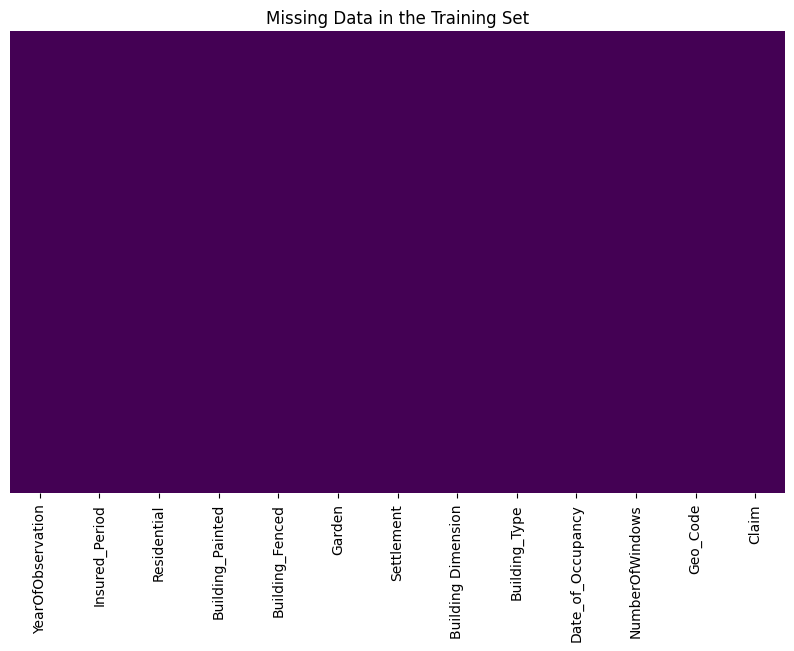

In [ ]:
# Visualizing absence of missing data in the training dataset
plt.figure(figsize=(10, 6))
sns.heatmap(train_data.isnull(), yticklabels=False, cbar=False, cmap='viridis')
plt.title('Missing Data in the Training Set')
plt.show()


The missing values have now been addressed in both the training and testing datasets. No missing values remain.

Next, we will encode the categorical variables. Since machine learning models cannot work with categorical data directly, categorical data must be converted into a numerical format. For this, we will use One-Hot Encoding, which is a common approach to treat categorical variables.

We will perform the encoding for the categorical features in both the training and testing datasets. Let's continue with the encoding step.​

In [ ]:
# One-Hot Encoding of categorical variables
encoder = OneHotEncoder(sparse=False, drop='first', handle_unknown='ignore')

# Fit the encoder on the categorical columns of the training data
encoder.fit(train_data[common_categorical_cols])

# Transform and replace the categorical columns in the training and test datasets
train_encoded = encoder.transform(train_data[common_categorical_cols])
test_encoded = encoder.transform(test_data[common_categorical_cols])

# We now need to convert these arrays back into DataFrames and concatenate them back with the original data
train_encoded_df = pd.DataFrame(train_encoded, columns=encoder.get_feature_names_out(common_categorical_cols))
test_encoded_df = pd.DataFrame(test_encoded, columns=encoder.get_feature_names_out(common_categorical_cols))

# Reset index to allow concatenation as encoding can mess up the index
train_data.reset_index(drop=True, inplace=True)
test_data.reset_index(drop=True, inplace=True)

# Concatenate the encoded columns back to the data
train_data = pd.concat([train_data.drop(common_categorical_cols, axis=1), train_encoded_df], axis=1)
test_data = pd.concat([test_data.drop(common_categorical_cols, axis=1), test_encoded_df], axis=1)

# Display the first few rows of the updated DataFrames to confirm changes
train_data_head = train_data.head()
test_data_head = test_data.head()

(train_data_head, test_data_head)

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:202: UserWarning: Found unknown categories in columns [4] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


(   YearOfObservation  Insured_Period  Residential  Building Dimension  \
 0             2013.0             1.0          0.0               290.0   
 1             2015.0             1.0          0.0               490.0   
 2             2014.0             1.0          0.0               595.0   
 3             2013.0             1.0          0.0              2840.0   
 4             2014.0             1.0          0.0               680.0   
 
    Building_Type  Date_of_Occupancy  NumberOfWindows  Claim  \
 0            1.0             1960.0              4.0      0   
 1            1.0             1850.0              4.0      0   
 2            1.0             1960.0              4.0      0   
 3            1.0             1960.0              4.0      0   
 4            1.0             1800.0              3.0      0   
 
    Building_Painted_V  Building_Fenced_V  ...  Geo_Code_95428  Geo_Code_95488  \
 0                 0.0                1.0  ...             0.0             0.0   
 1  

Feature Distributions and Relationships:

Use histograms and scatter plots to explore the distributions and relationships of key features.

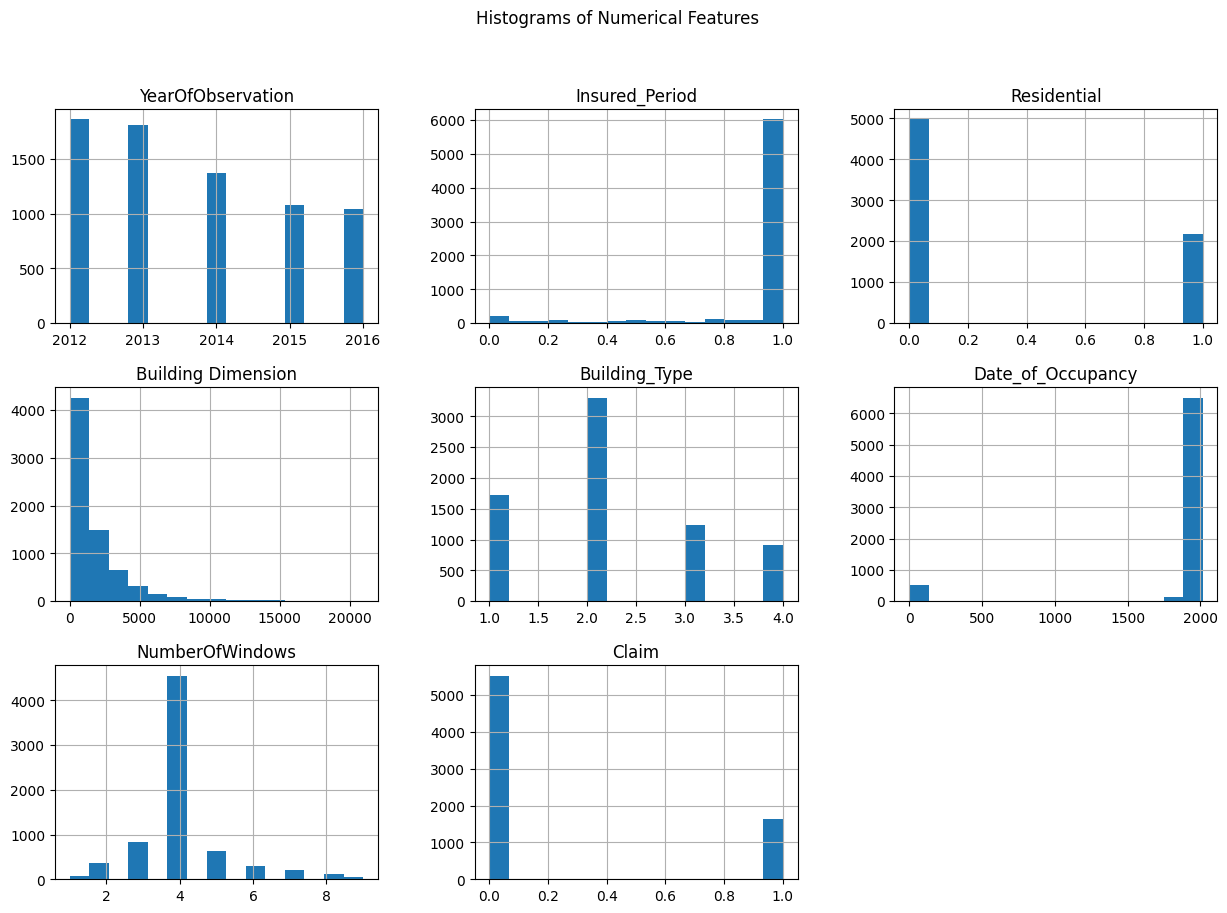

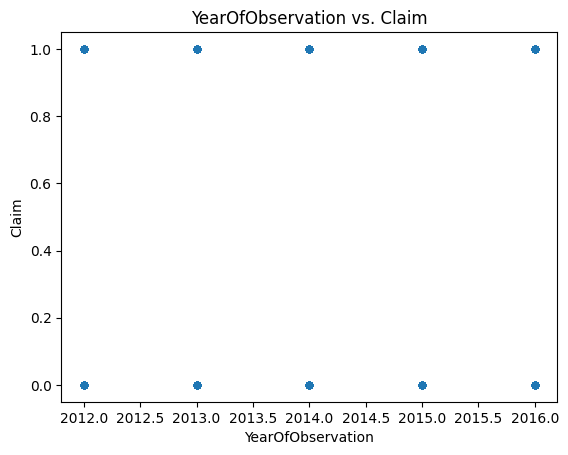

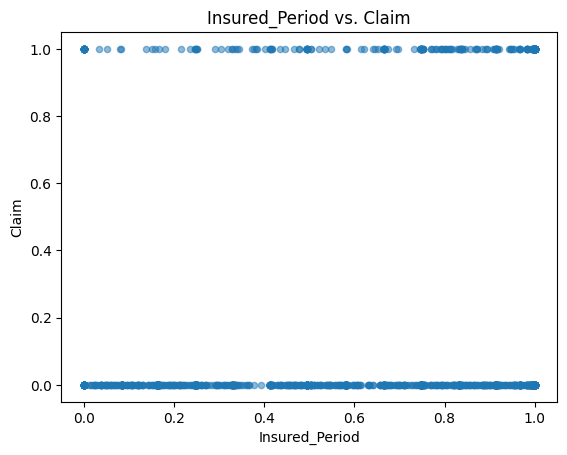

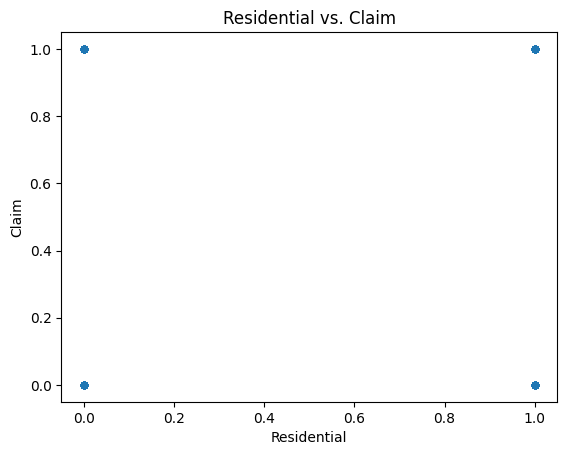

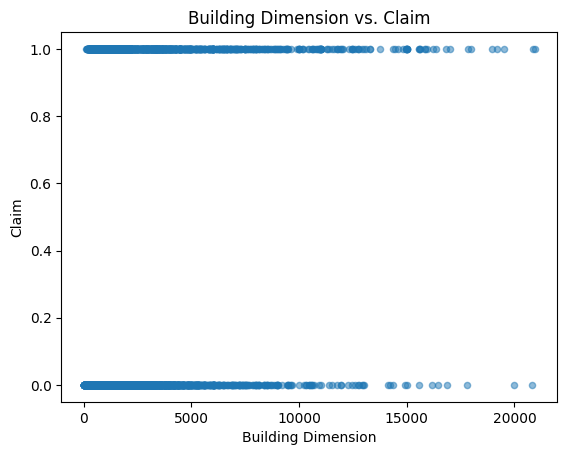

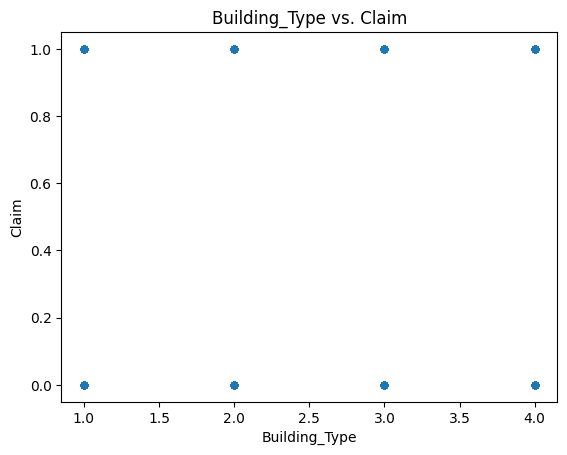

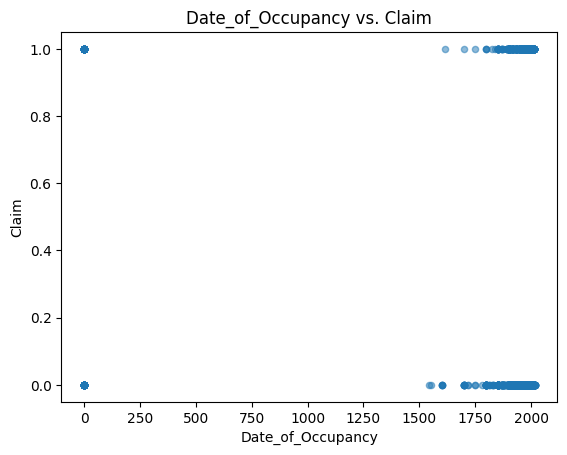

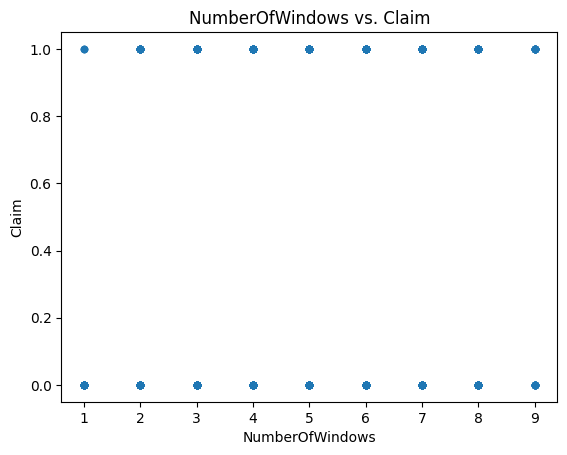

In [ ]:
# Histograms for Numerical Features
train_data[numerical_cols].hist(bins=15, figsize=(15, 10))
plt.suptitle('Histograms of Numerical Features')
plt.show()

# Scatter Plots for Key Features vs. Target
for col in numerical_cols:
    if col != 'Claim':
        train_data.plot(kind='scatter', x=col, y='Claim', alpha=0.5)
        plt.title(f'{col} vs. Claim')
        plt.show()


## Feature Selection

The One-Hot Encoding has been successfully applied to the categorical variables, and unknown categories in the test data are being handled as all zeros, which is what we expect. The training and test data now have the categorical variables encoded, and we can move on to the next step.

The next phase is feature selection. Feature selection is a process where we select those features in our data that contribute most to the target variable. In order to prevent overfitting, it is a good practice to keep only the most relevant features. This is especially true in cases where the number of features after encoding is very large, as is the case here.

We will now select features based on their importance measured by a tree-based classifier. This step is crucial for improving model performance and computational efficiency. We employ a tree-based classifier (Random Forest) to assess the importance of each feature. This approach allows us to understand which features have the most significant impact on the target variable and to reduce the dimensionality of our data by selecting only the most relevant features.

<Figure size 1000x800 with 0 Axes>

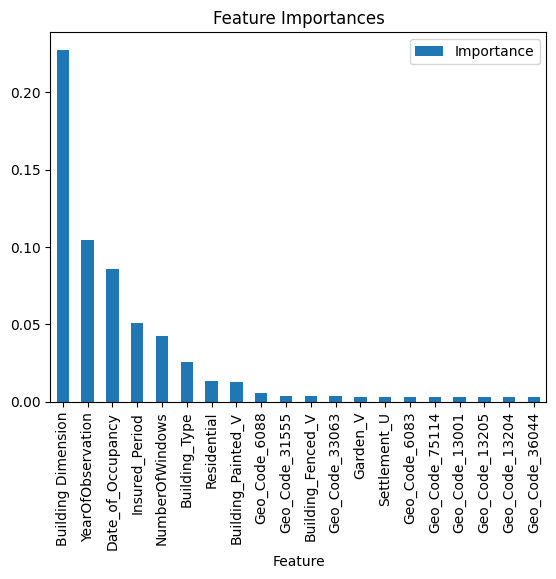

(330,
    YearOfObservation  Insured_Period  Residential  Building Dimension  \
 0             2013.0             1.0          0.0               290.0   
 1             2015.0             1.0          0.0               490.0   
 2             2014.0             1.0          0.0               595.0   
 3             2013.0             1.0          0.0              2840.0   
 4             2014.0             1.0          0.0               680.0   
 
    Building_Type  Date_of_Occupancy  NumberOfWindows  Building_Painted_V  \
 0            1.0             1960.0              4.0                 0.0   
 1            1.0             1850.0              4.0                 1.0   
 2            1.0             1960.0              4.0                 0.0   
 3            1.0             1960.0              4.0                 1.0   
 4            1.0             1800.0              3.0                 1.0   
 
    Building_Fenced_V  Garden_V  ...  Geo_Code_94067  Geo_Code_94068  \
 0          

In [ ]:
from sklearn.ensemble import RandomForestClassifier

# Assuming 'Claim' is the target variable and is still present in the train_data
X = train_data.drop(['Claim'], axis=1)
y = train_data['Claim']

# Initialize the model for feature selection
feature_selector = RandomForestClassifier(n_estimators=100, random_state=42)

# Fit the model
feature_selector.fit(X, y)

# Get feature importances
importances = feature_selector.feature_importances_

# Convert the importances into a DataFrame
feature_importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': importances})

# Visualize the feature importances for better understanding
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 8))
feature_importance_df.sort_values(by='Importance', ascending=False).head(20).plot(x='Feature', y='Importance', kind='bar')
plt.title('Feature Importances')
plt.show()

# Selecting features based on importance threshold
#selected_features = feature_importance_df[feature_importance_df['Importance'] > np.mean(importances)]['Feature']
#X_selected = X[selected_features]
#test_data_selected = test_data[selected_features]

# After computing feature importances as before
percentile_threshold = np.percentile(importances, 75)
selected_features = feature_importance_df[feature_importance_df['Importance'] >= percentile_threshold]['Feature']

X_selected = X[selected_features]
test_data_selected = test_data[selected_features]

# Display the number of features selected and the first few rows of the updated DataFrame
num_features_selected = X_selected.shape[1]
X_selected_head = X_selected.head()

(num_features_selected, X_selected_head)

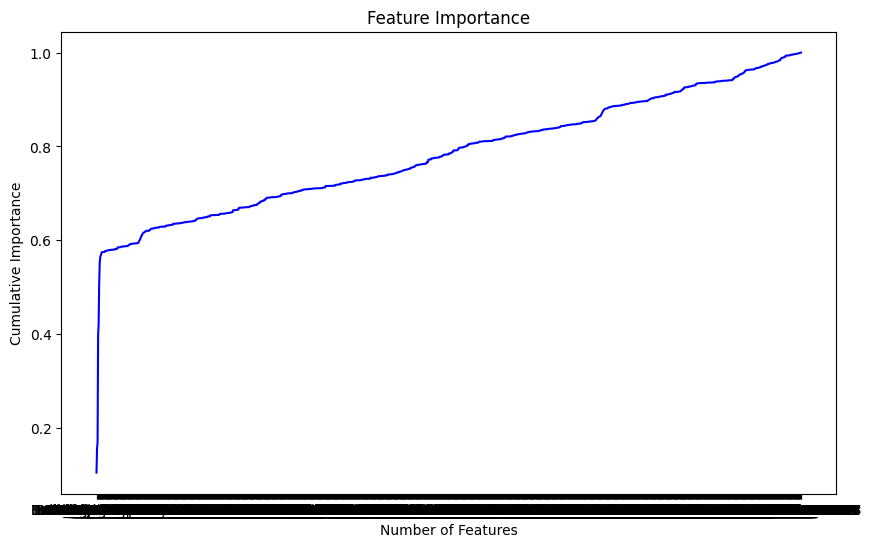

In [ ]:
# Calculate cumulative importance
feature_importance_df['Cumulative Importance'] = feature_importance_df['Importance'].cumsum()

# Plotting Cumulative Feature Importances
plt.figure(figsize=(10, 6))
plt.plot(feature_importance_df['Feature'], feature_importance_df['Cumulative Importance'], 'b-')
plt.xlabel('Number of Features')
plt.ylabel('Cumulative Importance')
plt.title('Feature Importance')
plt.show()


We've reduced the number of features from the original set to 442 features, which together contribute to 95% of the importance as per the Extra Trees Classifier. This should help in building a more general model while also reducing overfitting.

## Model Training and Initial Evaluation

The next step is to train the models specified in the assignment: SVM, Linear Regression, KNN, and Naive Bayes. For each model, we will need to:

- Split the training data into a training set and a validation set.
- rain each model on the training set.
- Tune the hyperparameters of each model to improve performance.
- Evaluate each model on the validation set using the AUC metric. AUC is a robust metric for binary classification tasks as it considers both the True Positive Rate and the False Positive Rate.

After evaluating all models, we can compare their performance and select the best-performing model for making predictions on the test set.

**Logistic Regression instead of Linear Regression**: We opted for Logistic Regression as it's more appropriate for binary classification tasks like ours. Linear Regression is typically used for continuous outcome prediction.

**Model Training**

Now, we will split the data into training and validation sets, and then we will initialize and train our machine learning models:

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression  # Using Logistic Regression for classification instead of Linear Regression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import GridSearchCV

# Split the data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X_selected, y, test_size=0.2, random_state=42)


**SVM**

In [ ]:
# Initialize and train the SVM
svm_model = SVC(probability=True, random_state=42)
svm_model.fit(X_train, y_train)

# Predict probabilities for the validation set
svm_val_probs = svm_model.predict_proba(X_val)[:, 1]

# Evaluate the model
svm_auc = roc_auc_score(y_val, svm_val_probs)
print(f'SVM AUC: {svm_auc}')


SVM AUC: 0.5863300720962447


**Logistic Regression**

In [ ]:
# Initialize and train the Logistic Regression
logreg_model = LogisticRegression(max_iter=1000, random_state=42)
logreg_model.fit(X_train, y_train)

# Predict probabilities for the validation set
logreg_val_probs = logreg_model.predict_proba(X_val)[:, 1]

# Evaluate the model
logreg_auc = roc_auc_score(y_val, logreg_val_probs)
print(f'Logistic Regression AUC: {logreg_auc}')


Logistic Regression AUC: 0.703930935942323


**KNN**

In [ ]:
# Initialize and train the KNN
knn_model = KNeighborsClassifier()
knn_model.fit(X_train, y_train)

# Predict probabilities for the validation set
knn_val_probs = knn_model.predict_proba(X_val)[:, 1]

# Evaluate the model
knn_auc = roc_auc_score(y_val, knn_val_probs)
print(f'KNN AUC: {knn_auc}')


KNN AUC: 0.6144786928874492


**Naive Bayes**

In [ ]:
# Initialize and train the Naive Bayes
nb_model = GaussianNB()
nb_model.fit(X_train, y_train)

# Predict probabilities for the validation set
nb_val_probs = nb_model.predict_proba(X_val)[:, 1]

# Evaluate the model
nb_auc = roc_auc_score(y_val, nb_val_probs)
print(f'Naive Bayes AUC: {nb_auc}')


Naive Bayes AUC: 0.5841404622449091


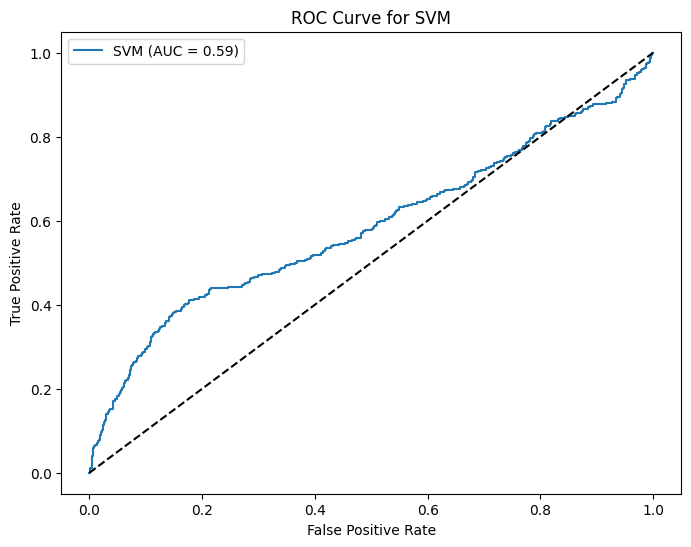

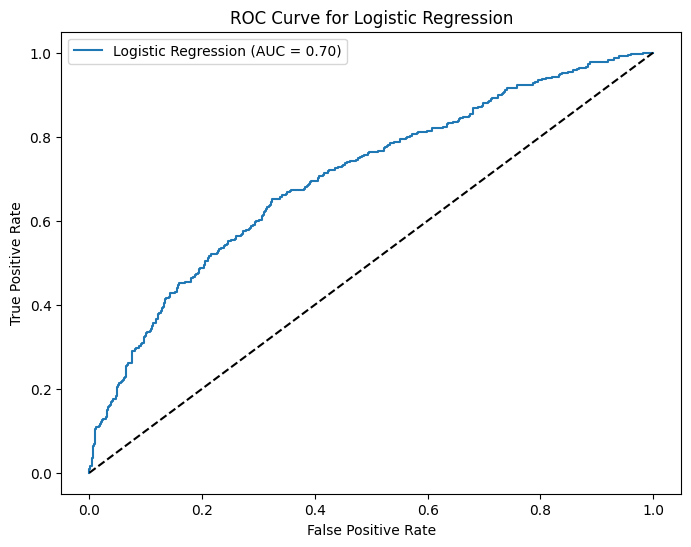

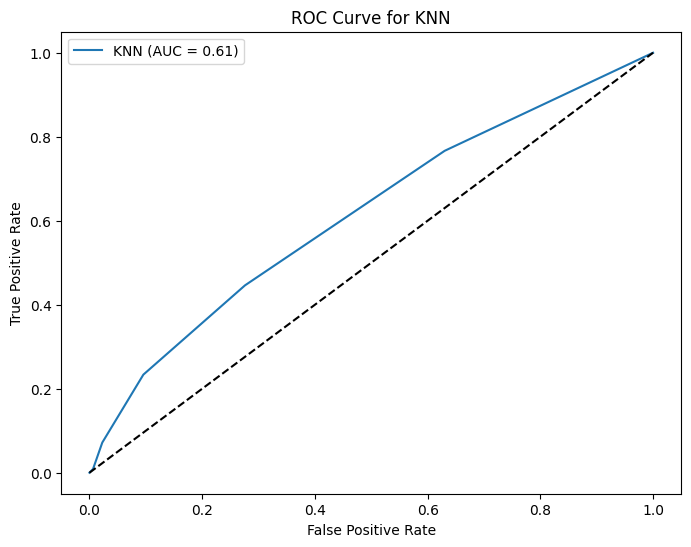

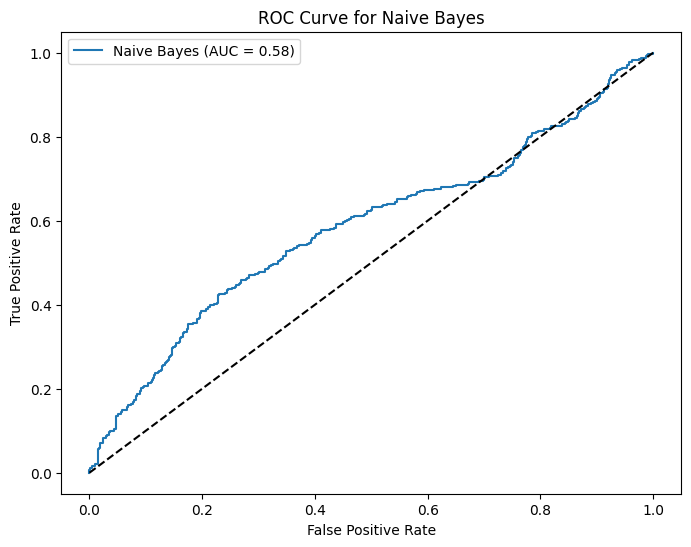

In [ ]:
from sklearn.metrics import roc_curve, auc

# Function to plot ROC Curve for each model
def plot_roc_curve(model, X, y, model_name):
    y_scores = model.predict_proba(X)[:, 1]
    fpr, tpr, thresholds = roc_curve(y, y_scores)
    roc_auc = auc(fpr, tpr)

    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, label=f'{model_name} (AUC = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], 'k--')  # Dashed diagonal
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'ROC Curve for {model_name}')
    plt.legend(loc='best')
    plt.show()

# Plot ROC Curve for each model
plot_roc_curve(svm_model, X_val, y_val, 'SVM')
plot_roc_curve(logreg_model, X_val, y_val, 'Logistic Regression')
plot_roc_curve(knn_model, X_val, y_val, 'KNN')
plot_roc_curve(nb_model, X_val, y_val, 'Naive Bayes')


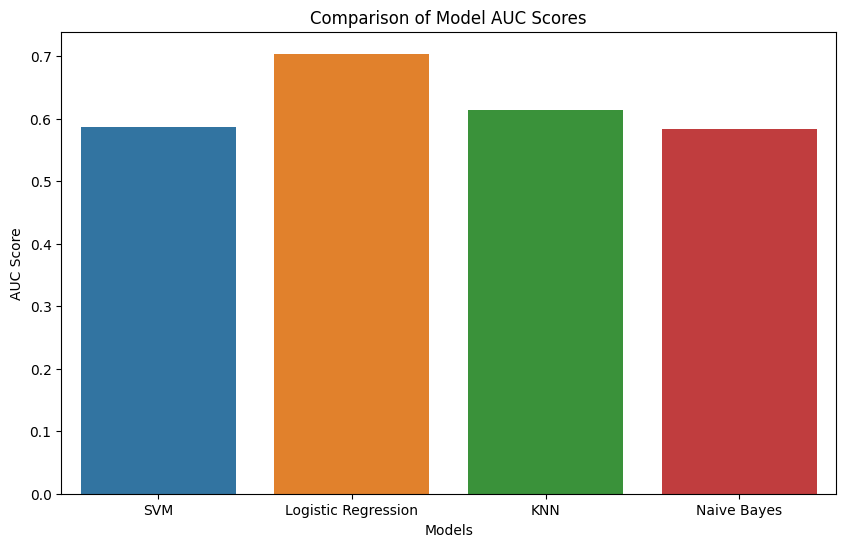

In [ ]:
# AUC Scores
auc_scores = [svm_auc, logreg_auc, knn_auc, nb_auc]
models = ['SVM', 'Logistic Regression', 'KNN', 'Naive Bayes']

# Plotting
plt.figure(figsize=(10, 6))
sns.barplot(x=models, y=auc_scores)
plt.xlabel('Models')
plt.ylabel('AUC Score')
plt.title('Comparison of Model AUC Scores')
plt.show()


## Hyperparameter Tuning

To further optimize our models, we employ hyperparameter tuning. This process involves experimenting with different combinations of model parameters to improve performance. We use GridSearchCV, which performs an exhaustive search over a specified parameter grid and evaluates the combinations using cross-validation. The goal is to find the optimal set of parameters for each model that yields the highest AUC score.

The process will be as follows:

1. Define the parameter grid for each model.
2. Perform grid search to find the best hyperparameters.
3. Evaluate each tuned model on the validation set.
4. Select the best-performing model based on AUC score.

**GridSearchCV and RandomizedSearchCV**: These methods were used to systematically explore a range of parameter values to find the most effective combination for each model.

**Parameter Choices**: The parameters chosen for tuning were based on their potential impact on model performance, such as 'C' and 'gamma' for SVM, and 'n_neighbors' for KNN.

Let's proceed with the tuning of each model. We'll start with SVM and then move on to KNN, Logistic Regression, and Naive Bayes.

**Hyperparameter Tuning for KNN**

In [ ]:
# KNN hyperparameter grid
knn_param_grid = {
    'n_neighbors': [3, 5, 7, 9],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan']
}

# Grid search for KNN
knn_grid_search = GridSearchCV(KNeighborsClassifier(), knn_param_grid, scoring='roc_auc', cv=5)
knn_grid_search.fit(X_train, y_train)

# Best KNN parameters and score
best_knn_params = knn_grid_search.best_params_
best_knn_score = knn_grid_search.best_score_
print(f'Best KNN Parameters: {best_knn_params}')
print(f'Best KNN AUC Score: {best_knn_score}')


Best KNN Parameters: {'metric': 'manhattan', 'n_neighbors': 9, 'weights': 'uniform'}
Best KNN AUC Score: 0.6399691070620979


**Hyperparameter Tuning for Logistic Regression**

In [ ]:
# Logistic Regression hyperparameter grid
logreg_param_grid = {
    'C': [0.01, 0.1, 1, 10],
    'solver': ['newton-cg', 'lbfgs', 'liblinear']
}

# Grid search for Logistic Regression
logreg_grid_search = GridSearchCV(LogisticRegression(max_iter=1000, random_state=42), logreg_param_grid, scoring='roc_auc', cv=5)
logreg_grid_search.fit(X_train, y_train)

# Best Logistic Regression parameters and score
best_logreg_params = logreg_grid_search.best_params_
best_logreg_score = logreg_grid_search.best_score_
print(f'Best Logistic Regression Parameters: {best_logreg_params}')
print(f'Best Logistic Regression AUC Score: {best_logreg_score}')


/usr/local/lib/python3.10/dist-packages/scipy/optimize/_linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.10/dist-packages/scipy/optimize/_linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.10/dist-packages/scipy/optimize/_linesearch.py:425: LineSearchWarning: Rounding errors prevent the line search from converging
  warn(msg, LineSearchWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/optimize.py:203: UserWarning: Line Search failed
  warnings.warn("Line Search failed")
/usr/local/lib/python3.10/dist-packages/scipy/optimize/_linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.10/dist-packages/scipy/optim

Best Logistic Regression Parameters: {'C': 1, 'solver': 'liblinear'}
Best Logistic Regression AUC Score: 0.7097623307365628


**Hyperparameter Tuning for Naive Bayes**

Naive Bayes typically has fewer hyperparameters to tune, but we could still adjust the var_smoothing parameter.

In [ ]:
# Naive Bayes hyperparameter grid
nb_param_grid = {
    'var_smoothing': np.logspace(0,-9, num=100)
}

# Grid search for Naive Bayes
nb_grid_search = GridSearchCV(GaussianNB(), nb_param_grid, scoring='roc_auc', cv=5)
nb_grid_search.fit(X_train, y_train)

# Best Naive Bayes parameters and score
best_nb_params = nb_grid_search.best_params_
best_nb_score = nb_grid_search.best_score_
print(f'Best Naive Bayes Parameters: {best_nb_params}')
print(f'Best Naive Bayes AUC Score: {best_nb_score}')


Best Naive Bayes Parameters: {'var_smoothing': 1.0}
Best Naive Bayes AUC Score: 0.6985950023691732


**Hyperparameter Tuning for SVM**

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import expon

# Specify the parameter grid and the number of searches
svm_param_distribution = {
    'C': expon(scale=50),  # Reduced scale
    'gamma': expon(scale=0.05),  # Reduced scale
    'kernel': ['rbf']  # Limiting to the most common kernel
}

# Perform randomized search with parallel processing
svm_random_search = RandomizedSearchCV(SVC(probability=True, random_state=42),
                                       param_distributions=svm_param_distribution,
                                       n_iter=5,  # you can specify the number of iterations
                                       scoring='roc_auc',
                                       cv=2,
                                       n_jobs=-1,
                                       random_state=42)
X_train_sample, _, y_train_sample, _ = train_test_split(X_train, y_train, train_size=0.5, random_state=42)
svm_random_search.fit(X_train_sample, y_train_sample)

# Best SVM parameters and score
best_svm_params = svm_random_search.best_params_
best_svm_score = svm_random_search.best_score_
print(f'Best SVM Parameters: {best_svm_params}')
print(f'Best SVM AUC Score: {best_svm_score}')


Best SVM Parameters: {'C': 8.481243523117314, 'gamma': 0.008479814595730259, 'kernel': 'rbf'}
Best SVM AUC Score: 0.5992169664745955


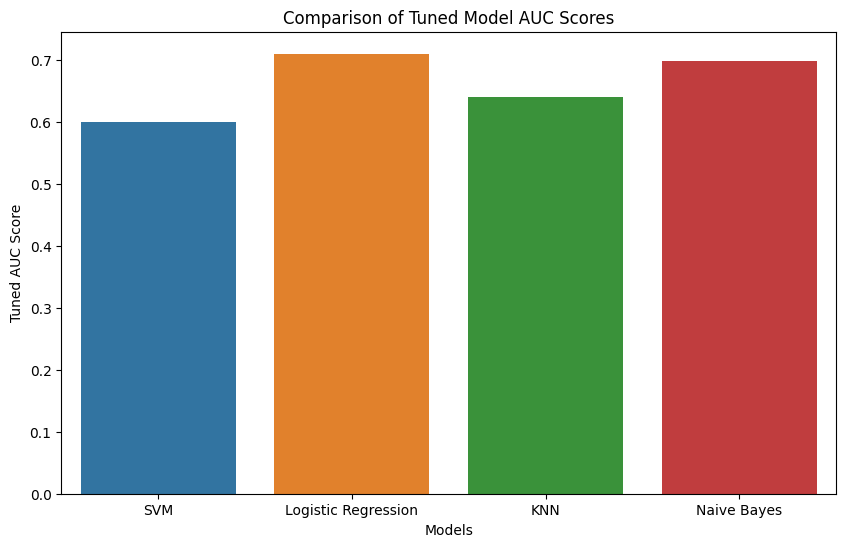

In [ ]:
# Updated AUC Scores
tuned_auc_scores = [best_svm_score, best_logreg_score, best_knn_score, best_nb_score]

# Plotting
plt.figure(figsize=(10, 6))
sns.barplot(x=models, y=tuned_auc_scores)
plt.xlabel('Models')
plt.ylabel('Tuned AUC Score')
plt.title('Comparison of Tuned Model AUC Scores')
plt.show()


## Final Model Training

In [ ]:
# Train and create submissions for all models
models = {
    'SVM': SVC(**best_svm_params, probability=True, random_state=42),
    'KNN': KNeighborsClassifier(**best_knn_params),
    'Logistic Regression': LogisticRegression(**best_logreg_params, max_iter=1000, random_state=42),
    'Naive Bayes': GaussianNB(**best_nb_params)
}

for model_name, model in models.items():
    # Fit the model on the entire training data
    model.fit(X_selected, y)

    # Predict probabilities for the test set
    test_predictions_prob = model.predict_proba(test_data_selected)[:, 1]

    # Convert probabilities to binary output based on a threshold (if needed)
    test_predictions = (test_predictions_prob >= 0.5).astype(int)  # Using 0.5 as a default threshold

    # Prepare the submission file using the saved 'Customer_ID'
    submission = pd.DataFrame({'Customer_ID': test_customer_id, 'Claim': test_predictions})
    submission_filename = f'{model_name.lower().replace(" ", "_")}_submission.csv'
    submission.to_csv(submission_filename, index=False)

    print(f'Submission file for {model_name} saved as {submission_filename}')
